In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import datetime
import time as systime
import sklearn

In [ ]:
surveyData = pd.read_csv("/content/drive/Shareddrives/AML_Project/Survey/Student_survey_new.csv")
# print(surveyData.Time)

In [ ]:
## Inserting unix time into survey data for working with physiological sensor data.
from csv import unix_dialect
times = list(surveyData.Time)
unixTimes = []
for t in times:
  surveyDate, surveyTime = t.split()
  date,month,year = surveyDate.split("/")
  hour,minutes = surveyTime.split(":")
  date = int(date)
  month = int(month)
  year = int(year)
  hour = int(hour)
  minutes = int(minutes)
  dateTime = datetime.datetime(year, month, date, hour, minutes)
  formattedTime = int(systime.mktime(dateTime.timetuple()))
  unixTimes.append(formattedTime-39600)
surveyData.insert(2, "UnixTimes", unixTimes, True)
# surveyData.insert(loc=2, column= "UnixTimes", value=unixTimes, allow_duplicates=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Heart Rate insertion into survey data.
pd.options.display.float_format = '{:.3f}'.format
heartStdDev = []
heartAvg = []
tempStdDev = []
tempAvg = []
EDAStdDev = []
EDAAvg = []
importString = "/content/drive/Shareddrives/AML_Project/newDataDir/"
# heartPhysioData = pd.DataFrame()
for i in range(surveyData.shape[0]):
# for i in range(0,3):
  pid = surveyData.Pid[i]
  time = surveyData.Time[i]
  timeOfSurvey = surveyData.UnixTimes[i]
  surveyDate, surveyTime = time.split()
  date,month,year = surveyDate.split("/")
  heartPhysioDataFile = importString+str(pid)+"/"+year+("%02d" % int(month))+("%02d" % int(date))+"_HR.csv"
  tempPhysioDataFile = importString+str(pid)+"/"+year+("%02d" % int(month))+("%02d" % int(date))+"_TEMP.csv"
  EDAPhysioDataFile = importString+str(pid)+"/"+year+("%02d" % int(month))+("%02d" % int(date))+"_EDA.csv"
  # print(heartPhysioDataFile)
  try:
    heartData = pd.read_csv(heartPhysioDataFile, header=None)
    tempData = pd.read_csv(tempPhysioDataFile, header=None)
    EDAData = pd.read_csv(EDAPhysioDataFile, header=None)
  except (IOError, OSError) as e:
    heartStdDev.append("NA")
    heartAvg.append("NA")
    tempStdDev.append("NA")
    tempAvg.append("NA")
    EDAStdDev.append("NA")
    EDAAvg.append("NA")
    continue
  # print(heartData)
  initialHeartPhysioTime = int(heartData[0][0])
  heartSensorFreq = int(heartData[0][1])
  heartSurveyIndex = int((timeOfSurvey - initialHeartPhysioTime)*heartSensorFreq)
  if heartSurveyIndex < 0:
    #Not sure how this happens. The participant fills out the survey before even putting on the smartbands?
    heartData = heartData[0][2:((3600*heartSensorFreq)+2)]

    # Taking 60 mins of data from the time of survey recording.
  else:
    heartData = heartData[0][(heartSurveyIndex+2-(3600*heartSensorFreq)):heartSurveyIndex+2-(300*heartSensorFreq)]
  # heartPhysioData.insert(pid, column=pid, value=heartData,allow_duplicates=True)
  heartStdDev.append(heartData.std())
  heartAvg.append(heartData.mean())
# Temperature Data insertion into survey data.
  initialTempPhysioTime = int(tempData[0][0])
  tempSensorFreq = int(tempData[0][1])
  tempSurveyIndex = int((timeOfSurvey - initialTempPhysioTime)*tempSensorFreq)
  if tempSurveyIndex < 0:
    #Not sure how this happens. The participant fills out the survey before even putting on the smartbands?
    tempData = tempData[0][2:((3600*tempSensorFreq)+2)]
    # Taking 60 mins of data from the time of survey recording.
  else:
    tempData = tempData[0][(tempSurveyIndex+2-(3600*tempSensorFreq)):tempSurveyIndex+2-(300*tempSensorFreq)]
  tempStdDev.append(tempData.std())
  tempAvg.append(tempData.mean())
# Electro Dermal Activity Data insertion into survey data.
  initialEDAPhysioTime = int(EDAData[0][0])
  EDASensorFreq = int(EDAData[0][1])
  EDASurveyIndex = int((timeOfSurvey - initialEDAPhysioTime)*EDASensorFreq)
  if EDASurveyIndex < 0:
    #Not sure how this happens. The participant fills out the survey before even putting on the smartbands?
    EDAData = EDAData[0][2:((3600*EDASensorFreq)+2)]
    # Taking 60 mins of data from the time of survey recording.
  else:
    EDAData = EDAData[0][(EDASurveyIndex+2-(3600*EDASensorFreq)):EDASurveyIndex+2-(300*EDASensorFreq)]
  EDAStdDev.append(EDAData.std())
  EDAAvg.append(EDAData.mean())

surveyData.insert(6, column="HRStdDev", value=heartStdDev, allow_duplicates=True)
surveyData.insert(7, column="HRAvg", value=heartAvg, allow_duplicates=True)
surveyData.insert(8, column="tempStdDev", value=tempStdDev, allow_duplicates=True)
surveyData.insert(9, column="tempAvg", value=tempAvg, allow_duplicates=True)
surveyData.insert(10, column="EDAStdDev", value=EDAStdDev, allow_duplicates=True)
surveyData.insert(11, column="EDAAvg", value=EDAAvg, allow_duplicates=True)
surveyDataBackup = surveyData

In [ ]:
surveyData = pd.read_csv("/content/drive/Shareddrives/AML_Project/surveyData.csv")
surveyData = surveyData.drop("Unnamed: 0", axis=1)

In [ ]:
# Restore point lol
surveyDataBackup = surveyData
surveyData = surveyDataBackup
surveyData

In [ ]:
# df_sort = df[(df['Occupied'] == 1) & (df['SchoolDay'] == 1) & (df['UsabilityMask'].__eq__(True))]
# df_sort.shape
import numpy as np
from sklearn.preprocessing import LabelEncoder
surveyData = surveyData[(surveyData["HRStdDev"] != "NA")]
# surveyData.shape
le = LabelEncoder()
le.fit(surveyData["Engage_1"])
# print(list(le.classes_))
surveyData.drop(["Pid", "Time", "UnixTimes", "Confidence_level"], axis=1)
surveyData['Engage_1'] = le.fit_transform(surveyData['Engage_1'])
surveyData['Engage_2'] = le.fit_transform(surveyData['Engage_2'])
surveyData['Engage_3'] = le.fit_transform(surveyData['Engage_3'])
surveyData['Engage_4'] = le.fit_transform(surveyData['Engage_4'])
surveyData['Engage_5'] = le.fit_transform(surveyData['Engage_5'])
surveyData =surveyData.dropna().reset_index(drop=True)

print(surveyData["Thermal_preference"].value_counts())

# Removing imbalances as seen in the above data using SMOTE

from matplotlib import pyplot
from imblearn.over_sampling import SMOTE

featureNames =["Thermal_sensation", "HRStdDev", "HRAvg", "tempStdDev", "tempAvg", "EDAStdDev", "EDAAvg", "Engage_1", "Engage_2", "Engage_3", "Engage_4", "Engage_5", "Arousal", "Valence"]
targetNames = ["Thermal_preference"]

X = surveyData[featureNames]
y = surveyData[targetNames]

oversample = SMOTE()
X, y = oversample.fit_resample(X,y)
print(y.value_counts())



No change    72
Cooler       54
Warmer       10
Name: Thermal_preference, dtype: int64
Thermal_preference
Cooler                72
No change             72
Warmer                72
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifierKNN = KNeighborsClassifier(n_neighbors = 3)
classifierKNN.fit(X_train, y_train.values.ravel())
y_pred = classifierKNN.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# from lazypredict.Supervised import LazyClassifier, LazyRegressor
# from sklearn.model_selection import train_test_split

# clf = LazyRegressor(predictions=True)
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)
# models

(172, 14)
(44, 14)
(172, 1)
(44, 1)
Accuracy: 0.7272727272727273


In [ ]:
featureNames =["Thermal_sensation", "HRStdDev", "HRAvg", "tempStdDev", "tempAvg", "EDAStdDev", "EDAAvg", "Engage_1", "Engage_2", "Engage_3", "Engage_4", "Engage_5", "Arousal", "Valence"]
targetNames = ["Thermal_preference"]

X = surveyData[featureNames]
y = surveyData[targetNames]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("RandomForestClassifier:")
RFclf = RandomForestClassifier(n_estimators = 50)
RFclf.fit(X_train, y_train.values.ravel())
y_pred = RFclf.predict(X_test)
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

######################################################################3
print("\n\nKNearestNeighborClassifer:")
classifierKNN = KNeighborsClassifier(n_neighbors = 3)
classifierKNN.fit(X_train, y_train.values.ravel())
y_pred = classifierKNN.predict(X_test)
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


RandomForestClassifier:
Confusion Matrix:
[[16  1  0]
 [ 2 10  1]
 [ 0  0 14]]


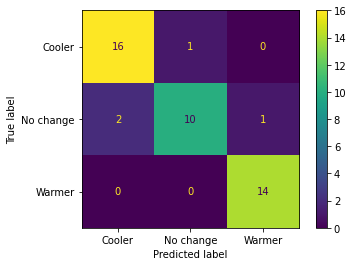

Classification Report:
              precision    recall  f1-score   support

      Cooler       0.89      0.94      0.91        17
   No change       0.91      0.77      0.83        13
      Warmer       0.93      1.00      0.97        14

    accuracy                           0.91        44
   macro avg       0.91      0.90      0.90        44
weighted avg       0.91      0.91      0.91        44

Accuracy: 0.9090909090909091


KNearestNeighborClassifer:
Confusion Matrix:


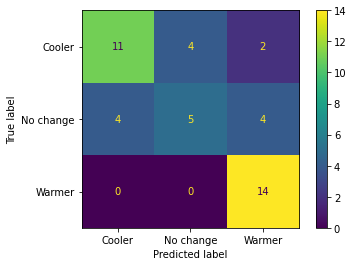

Classification Report:
              precision    recall  f1-score   support

      Cooler       0.73      0.65      0.69        17
   No change       0.56      0.38      0.45        13
      Warmer       0.70      1.00      0.82        14

    accuracy                           0.68        44
   macro avg       0.66      0.68      0.66        44
weighted avg       0.67      0.68      0.66        44

Accuracy: 0.6818181818181818


GradientBoostingClassifier:
0.7373626373626373
Confusion Matrix:
[[13  4  0]
 [ 3  8  2]
 [ 0  0 14]]


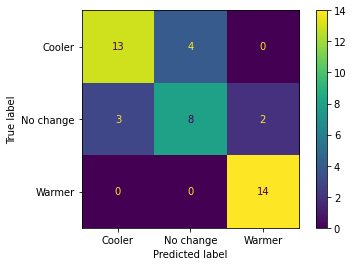

[[13  4  0]
 [ 3  8  2]
 [ 0  0 14]]
Classification Report:
              precision    recall  f1-score   support

      Cooler       0.81      0.76      0.79        17
   No change       0.67      0.62      0.64        13
      Warmer       0.88      1.00      0.93        14

    accuracy                           0.80        44
   macro avg       0.78      0.79      0.79        44
weighted avg       0.79      0.80      0.79        44

Accuracy: 0.7954545454545454


In [ ]:
featureNames =["Thermal_sensation", "HRStdDev", "HRAvg", "tempStdDev", "tempAvg", "EDAStdDev", "EDAAvg", "Engage_1", "Engage_2", "Engage_3", "Engage_4", "Engage_5", "Arousal", "Valence"]
targetNames = ["Thermal_preference"]

X = surveyData[featureNames]
y = surveyData[targetNames]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

###########  RandomForestClassifier  ############################################
print("RandomForestClassifier:")
RFclf = RandomForestClassifier(n_estimators = 50)
RFclf.fit(X_train, y_train.values.ravel())
# ConfusionMatrixDisplay.from_predictions
yPredRFC = RFclf.predict(X_test)
resultRFC = confusion_matrix(y_test, yPredRFC)
print("Confusion Matrix:")
cm = confusion_matrix(y_test, yPredRFC, labels=RFclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RFclf.classes_)
print(resultRFC)
disp.plot()
plt.show()
resultRFC1 = classification_report(y_test, yPredRFC)
print("Classification Report:",)
print (resultRFC1)
resultRFC2 = accuracy_score(y_test,yPredRFC)
print("Accuracy:",resultRFC2)

###########  KNeighborsClassifier  ##############################################
print("\n\nKNearestNeighborClassifer:")
classifierKNN = KNeighborsClassifier(n_neighbors = 3)
classifierKNN.fit(X_train, y_train.values.ravel())
yPredKNN = classifierKNN.predict(X_test)
resultKNN = confusion_matrix(y_test, yPredKNN)
print("Confusion Matrix:")
cm = confusion_matrix(y_test, yPredKNN, labels=classifierKNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifierKNN.classes_)
# print(resultKNN)
disp.plot()
plt.show()
resultKNN1 = classification_report(y_test, yPredKNN)
# plot_confusion_matrix(classifierKNN, X_test, y_test)
# print(resultKNN)
resultKNN1 = classification_report(y_test, yPredKNN)
print("Classification Report:",)
print (resultKNN1)
resultKNN2 = accuracy_score(y_test,yPredKNN)
print("Accuracy:",resultKNN2)

#######  GradientBoostingClassifier  ############################################
print("\n\nGradientBoostingClassifier:")
# GDBclf = GradientBoostingClassifier(n_estimators = 50, learning_rate = 1.0,max_depth = 1, random_state = 0).fit(X_train, y_train)
# y_pred = GDBclf.predict(X_test)
seed = 5
kfold = KFold(n_splits = 10, shuffle=True, random_state = seed)
num_trees = 100
max_features = 10
GDBclf = GradientBoostingClassifier(n_estimators = num_trees, max_features = max_features)
resultGDB = cross_val_score(GDBclf, X, y.values.ravel(), cv = kfold)
print(resultGDB.mean())
GDBclf.fit(X_train, y_train.values.ravel())
yPredGDB = GDBclf.predict(X_test)
resultGDB = confusion_matrix(y_test, yPredGDB)
print("Confusion Matrix:")
cm = confusion_matrix(y_test, yPredGDB, labels=GDBclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GDBclf.classes_)
print(resultGDB)
disp.plot()
plt.show()
resultGDB1 = classification_report(y_test, yPredGDB)
# plot_confusion_matrix(GDBclf, X_test, y_test)
print(resultGDB)
resultGDB1 = classification_report(y_test, yPredGDB)
print("Classification Report:",)
print (resultGDB1)
resultGDB2 = accuracy_score(y_test,yPredGDB)
print("Accuracy:",resultGDB2)


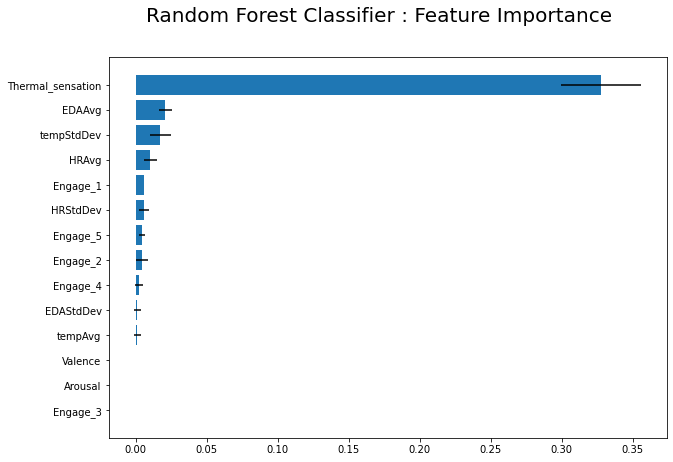

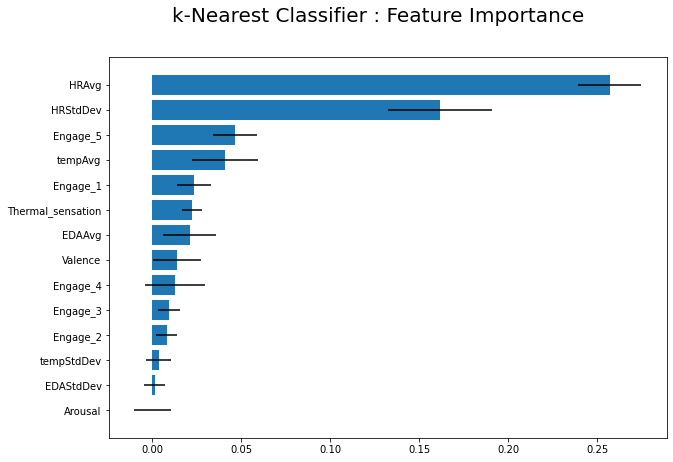

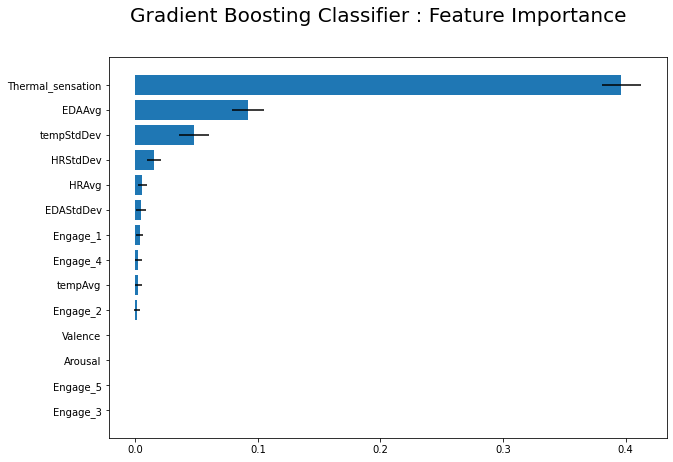

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib.pyplot import figure

def plot_feature_importances(perm_importance_result, feat_name, classifierName):
    fig, ax = plt.subplots()
    fig.suptitle(str(classifierName+" : Feature Importance"),fontsize=20)
    fig.set_figwidth(10)
    fig.set_figheight(7)
    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)), perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])
    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

perm_importance_result_RFC = permutation_importance(RFclf, X_train, y_train, n_repeats=5)
plot_feature_importances(perm_importance_result_RFC, X_train.columns,"Random Forest Classifier")
print("\n")
perm_importance_result_KNN = permutation_importance(classifierKNN, X_train, y_train, n_repeats=5)
plot_feature_importances(perm_importance_result_KNN, X_train.columns,"k-Nearest Classifier")
print("\n")
perm_importance_result_GDB = permutation_importance(GDBclf, X_train, y_train, n_repeats=5)
plot_feature_importances(perm_importance_result_GDB, X_train.columns,"Gradient Boosting Classifier")


In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
featureNames =["Thermal_sensation", "HRStdDev", "HRAvg", "tempStdDev", "tempAvg", "EDAStdDev", "EDAAvg", "Engage_1", "Engage_2", "Engage_3", "Engage_4", "Engage_5", "Arousal", "Valence"]
targetNames = ["Thermal_preference"]

X = surveyData[featureNames]
y = surveyData[targetNames]
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

In [ ]:
accuracies = []
for i in range(1,105):
  print("\n\nKNearestNeighborClassifer for i =", i)
  classifierKNN = KNeighborsClassifier(n_neighbors = i)
  classifierKNN.fit(X_train, y_train.values.ravel())
  yPredKNN = classifierKNN.predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  print("Acc = ", acc)
  accuracies.append(acc)
print(max(accuracies), accuracies.index(max(accuracies)))



KNearestNeighborClassifer for i = 1
Acc =  0.7272727272727273


KNearestNeighborClassifer for i = 2
Acc =  0.7272727272727273


KNearestNeighborClassifer for i = 3
Acc =  0.7272727272727273


KNearestNeighborClassifer for i = 4
Acc =  0.7272727272727273


KNearestNeighborClassifer for i = 5
Acc =  0.7272727272727273


KNearestNeighborClassifer for i = 6
Acc =  0.7272727272727273


KNearestNeighborClassifer for i = 7
Acc =  0.7272727272727273


KNearestNeighborClassifer for i = 8
Acc =  0.7272727272727273


KNearestNeighborClassifer for i = 9
Acc =  0.7272727272727273


KNearestNeighborClassifer for i = 10
Acc =  0.7272727272727273


KNearestNeighborClassifer for i = 11
Acc =  0.7272727272727273


KNearestNeighborClassifer for i = 12
Acc =  0.7272727272727273


KNearestNeighborClassifer for i = 13
Acc =  0.7272727272727273


KNearestNeighborClassifer for i = 14
Acc =  0.7272727272727273


KNearestNeighborClassifer for i = 15
Acc =  0.7272727272727273


KNearestNeighborClassifer for i 